In [19]:
import pandas as pd

In [20]:
from pykrx import stock
df_stock = stock.get_market_ohlcv_by_date('20000101', '20191231', '005380') # 현대차
df_stock_close = df_stock[['종가']]


In [21]:
df_stock_close['20일 중심선'] = df_stock_close['종가'].rolling(window=14).mean()
std_deviation = df_stock_close['종가'].rolling(window=14).std()
df_stock_close[19:25]

/tmp/ipykernel_79257/1636481721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['20일 중심선'] = df_stock_close['종가'].rolling(window=14).mean()


,종가,20일 중심선
날짜,,
2000-01-31,17100,17196.428571
2000-02-01,17000,17021.428571
2000-02-02,18300,16935.714286
2000-02-03,18550,16939.285714
2000-02-07,18500,16939.285714
2000-02-08,18100,16960.714286


In [22]:
std_deviation = df_stock_close['종가'].rolling(window=14).std()
df_stock_close['상단선'] = df_stock_close['20일 중심선'] + 2 * std_deviation
df_stock_close['하단선'] = df_stock_close['20일 중심선'] - 2 * std_deviation

/tmp/ipykernel_79257/3825681247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['상단선'] = df_stock_close['20일 중심선'] + 2 * std_deviation
/tmp/ipykernel_79257/3825681247.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['하단선'] = df_stock_close['20일 중심선'] - 2 * std_deviation


In [23]:
df_stock_close['매수'] = (df_stock_close['종가'] < df_stock_close['하단선'])
df_stock_close['매도'] = (df_stock_close['종가'] > df_stock_close['상단선'])


/tmp/ipykernel_79257/3746077047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stock_close['매수'] = (df_stock_close['종가'] < df_stock_close['하단선'])


In [24]:
# 4. 수익률 계산
df_stock_close['수익률'] = df_stock_close['종가'].pct_change()  # 종가 기준 수익률
df_stock_close['전략수익률'] = 0  # 전략 수익률 초기화
position = 0  # 초기 포지션 (보유 상태: 1=매수, -1=매도, 0=미보유)

In [25]:
for i in range(1, len(df_stock_close)):
    if df_stock_close['매수'].iloc[i] == 1:  # 매수 신호
        position = 1
    elif df_stock_close['매도'].iloc[i] == 1:  # 매도 신호
        position = -1

In [26]:
# 전략 수익률 반영
df_stock_close['전략수익률'].iloc[i] = df_stock_close['수익률'].iloc[i] * position

/tmp/ipykernel_79257/1266616097.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_stock_close['전략수익률'].iloc[i] = df_stock_close['수익률'].iloc[i] * position
/tmp/ipykernel_79257/1266616097.py:2: SettingWithCopyWarning: 
A value is trying t

In [27]:
# 5. 누적 수익률 계산
df_stock_close['누적수익률'] = (1 + df_stock_close['전략수익률']).cumprod()
df_stock_close['누적수익률_단순보유'] = (1 + df_stock_close['수익률']).cumprod()


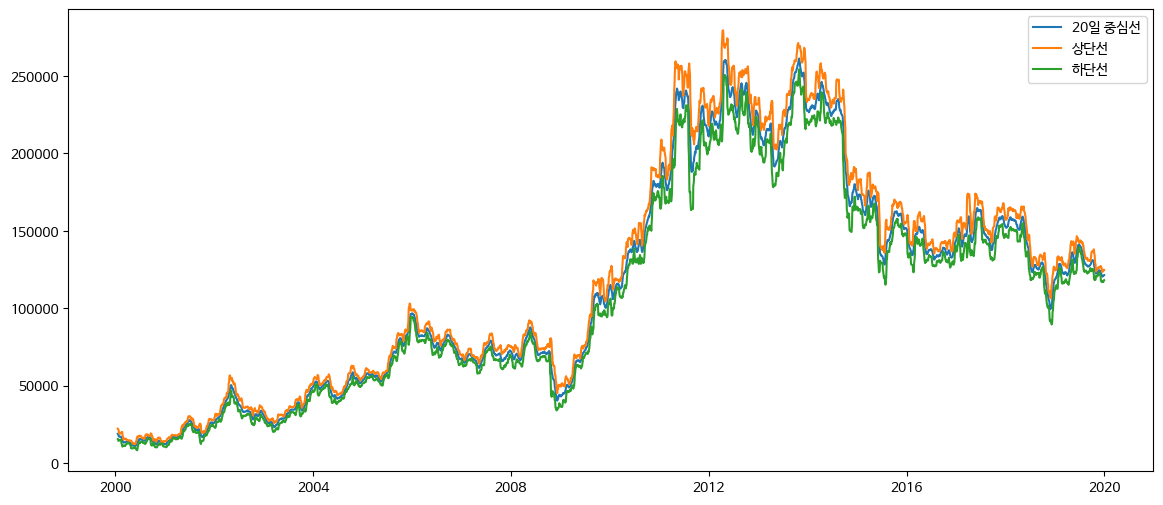

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))

plt.plot(df_stock_close['20일 중심선'], label='20일 중심선')
plt.plot(df_stock_close['상단선'], label='상단선')
plt.plot(df_stock_close['하단선'], label='하단선')

plt.legend()
plt.show()

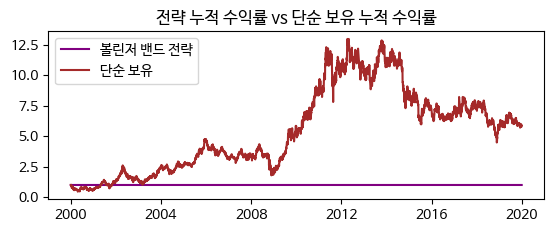

In [ ]:
# 누적 수익률 비교
plt.subplot(2, 1, 2)
plt.plot(df_stock_close['누적수익률'], label='볼린저 밴드 전략', color='purple')
plt.plot(df_stock_close['누적수익률_단순보유'], label='단순 보유', color='brown')
plt.title('전략 누적 수익률 vs 단순 보유 누적 수익률')
plt.legend()
plt.show()